# Erlang C (M/M/c model)

This is an implementation of the default Erlang C model (exponential inter-arrival and service times, `c` operators).

## Importing modules

In [1]:
# Erlang module
from queuesim.analytic import erlang_c_table

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set()
percent_formater = formater.PercentFormatter(xmax=1, decimals=0)

## Mean waiting time as a function of &rho;

In [2]:
# Arrival rate range
l_range = [1 / mean_i for mean_i in range(61, 85)]

# Service rate
mu = 1 / 600

# Number of operators
c = 10

# Erlang C results for different values of lambda
results = erlang_c_table([(l, mu, c) for l in l_range])

# Display results table
results

,lambda,mu,a,c,rho,E[N_Q],E[N],E[W],E[V]
0,0.016393,0.001667,9.836066,10,0.983607,56.454792,66.290858,3443.742325,4043.742325
1,0.016129,0.001667,9.677419,10,0.967742,26.564755,36.242174,1647.014815,2247.014815
2,0.015873,0.001667,9.523810,10,0.952381,16.669938,26.193748,1050.206120,1650.206120
3,0.015625,0.001667,9.375000,10,0.937500,11.770591,21.145591,753.317839,1353.317839
4,0.015385,0.001667,9.230769,10,0.923077,8.866947,18.097717,576.351580,1176.351580
5,0.015152,0.001667,9.090909,10,0.909091,6.959227,16.050136,459.308957,1059.308957
6,0.014925,0.001667,8.955224,10,0.895522,5.619064,14.574288,376.477299,976.477299
7,0.014706,0.001667,8.823529,10,0.882353,4.632369,13.455898,315.001078,915.001078
8,0.014493,0.001667,8.695652,10,0.869565,3.880276,12.575928,267.739047,867.739047
9,0.014286,0.001667,8.571429,10,0.857143,3.291530,11.862959,230.407098,830.407098


In [3]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0.5, 1.0, 'Erlang C model at different utilizations')

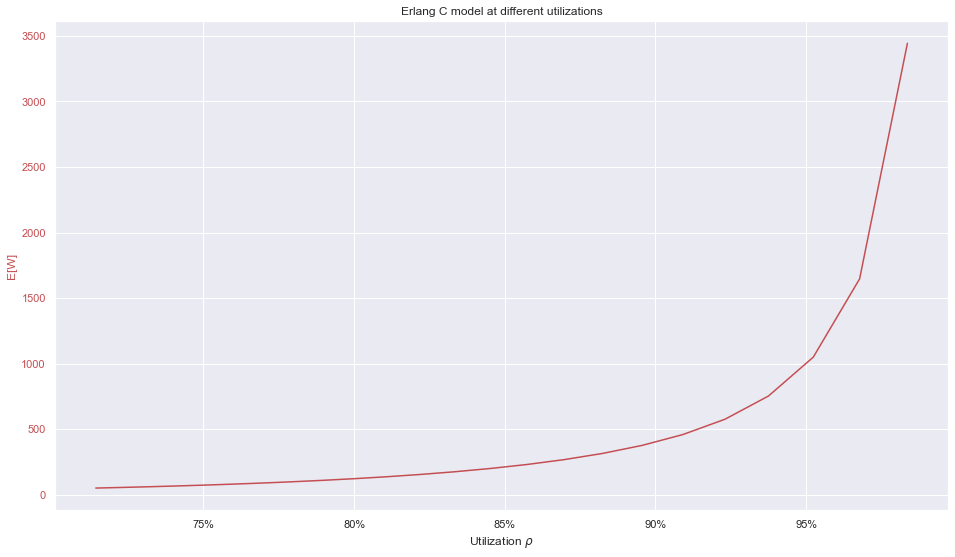

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(results["rho"], results["E[W]"], 'r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_xlabel("Utilization $\\rho$")
ax.set_ylabel("E[W]", color='r')
ax.xaxis.set_major_formatter(percent_formater)

ax.set_title("Erlang C model at different utilizations")

## Mean waiting time as a function of c

* Now the utilization will be fixed at &rho;=80%.
* The service rate will also stay fixed at &mu;=1/600.
* The arrival rate will be adjusted when changing c to keep &rho; fixed: &lambda;=&rho;*&mu;*c.

In [5]:
# Fixed utilization
rho = 0.8

# Service rate
mu = 1 / 600

# Number of operators range
c_range = range(1, 26)

# Erlang C results for different values of c
results = erlang_c_table([(rho * mu * c, mu, c) for c in c_range])

# Display results table
results

,lambda,mu,a,c,rho,E[N_Q],E[N],E[W],E[V]
0,0.001333,0.001667,0.8,1,0.8,3.200000,4.000000,2400.000000,3000.000000
1,0.002667,0.001667,1.6,2,0.8,2.844444,4.444444,1066.666667,1666.666667
2,0.004000,0.001667,2.4,3,0.8,2.588764,4.988764,647.191011,1247.191011
3,0.005333,0.001667,3.2,4,0.8,2.385730,5.585730,447.324354,1047.324354
4,0.006667,0.001667,4.0,5,0.8,2.216450,6.216450,332.467532,932.467532
5,0.008000,0.001667,4.8,6,0.8,2.071088,6.871088,258.886000,858.886000
6,0.009333,0.001667,5.6,7,0.8,1.943750,7.543750,208.258976,808.258976
7,0.010667,0.001667,6.4,8,0.8,1.830580,8.230580,171.616847,771.616847
8,0.012000,0.001667,7.2,9,0.8,1.728889,8.928889,144.074099,744.074099
9,0.013333,0.001667,8.0,10,0.8,1.636721,9.636721,122.754045,722.754045


Text(0.5, 1.0, 'Erlang C model at different numbers of operators (and the same utilization in all cases)')

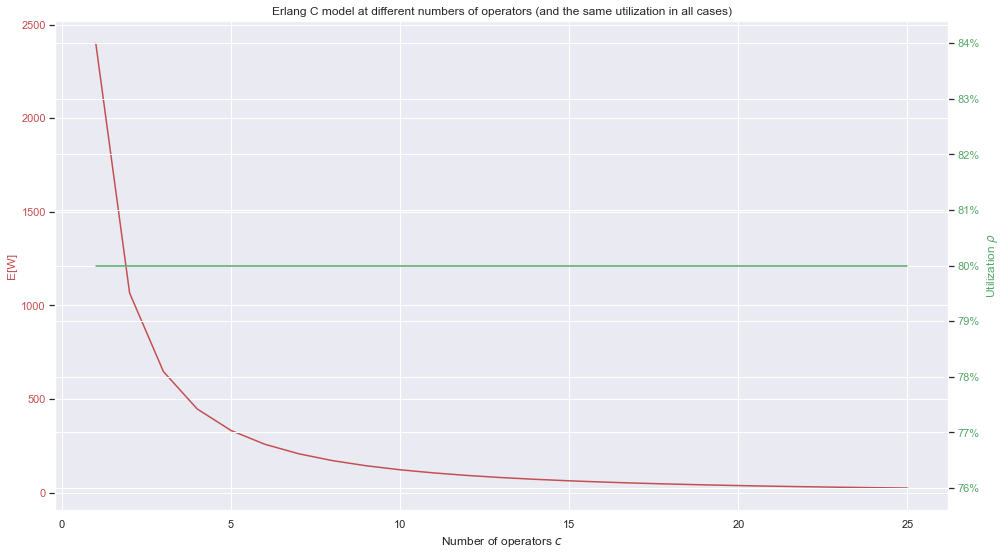

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(results["c"], results["E[W]"], 'r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_xlabel("Number of operators $c$")
ax.set_ylabel("E[W]", color='r')

ax = ax.twinx()
ax.plot(results["c"], results["rho"], 'g')
ax.tick_params(axis='y', labelcolor='g')
ax.set_ylabel("Utilization $\\rho$", color='g')
ax.yaxis.set_major_formatter(percent_formater)

ax.set_title("Erlang C model at different numbers of operators (and the same utilization in all cases)")

On a larger system (with more operators) the mean waiting time will be lower (at the same utilization) (Economy of scale).